# #Dragon Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
500    0
501    0
502    0
503    0
504    0
Name: CHAS, Length: 505, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.287364,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.705498,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.887750,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629250,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
#for histogram of dataset

#housing.hist(bins=50 , figsize=(20,15))
#plt.show()

## Train-Test Splitting

In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 404
Rows in test set : 101


If you want to make good model , you have to equally split important data so that model knows what kind of data it has to deal with.
suppose here CHAS column is that imp feature and we have to equally split it between train and test data.
And for that purpose we'll use Stratified-Shuffle-Split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
#94/7

In [16]:
#376/28

Here we can notice that both train and test set ratio is nearly equal that means every type of values are equally splitted between train and test data (only 2 types are there 0 and 1 : that means CHAS only contains value between 0 and 1)

In [17]:
housing = strat_train_set.copy()

# Looking for correlations

In [18]:
#makes correlation matrix

corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

#trying to know correlations b/w col above entered with other columns
#positive value means positively corelative and vice versa

MEDV       1.000000
RM         0.659973
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

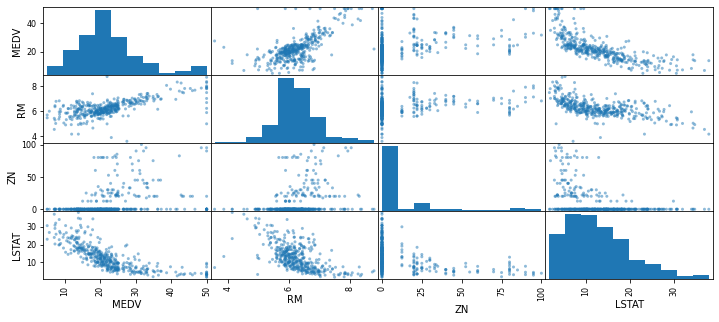

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,5))

#It gives histogram of feature in respect of itself..bcz there is not much insights 
#relation b/w any feature to itself in terms of matrix it'll always give straight line
#So all diagonal ele will be histograms

we can see that(in relation of MEDV) in above matrix RM is going up i.e. directly propotional to MEDV and LSTAT gives negative line i.e. inversely propotional

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

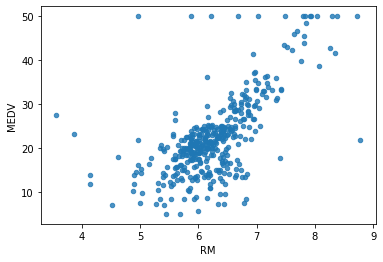

In [20]:
#Looking closely RM with MEDV
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8) 

# Trying out Attribute combinations

In [21]:
housing["Tax_RM"]=housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Tax_RM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

#negative value

MEDV       1.000000
RM         0.659973
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
Tax_RM    -0.508670
LSTAT     -0.739129
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='Tax_RM', ylabel='MEDV'>

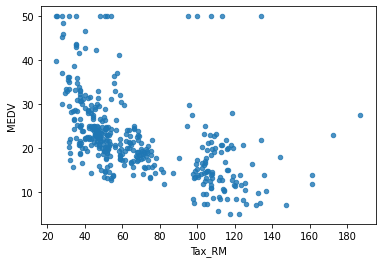

In [24]:
housing.plot(kind="scatter",x="Tax_RM",y="MEDV",alpha=0.8)

#inverse/negative graph

In [25]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [26]:
#to take care of missing att. you have 3 optns :
#    1. get rid of the missing data points
#    2. get rid of yhe whole att.
#    3. set the value to some value (0,mean or median)

#RM have some missing attributes

a = housing.dropna(subset=["RM"])   #optn 1
a.shape
#note that original housing dataframe will remain unchanged

(401, 13)

In [27]:
housing.drop("RM",axis=1).shape   #optn 2
#note that there is no RM column and also note that original housing dataframe will remain unchanged

(404, 12)

In [28]:
median = housing["RM"].median() #compute median for optn 3
median

6.185

In [29]:
housing["RM"].fillna(median)  #optn 3

housing.shape
#note that housing dataframe will remain unchanged

(404, 13)

In [30]:
housing.describe()  #before we started filling missing attributes
#RM = 399 values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.255214,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.690065,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.876000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.606000,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [31]:
#doing same using imputer

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [33]:
X= imputer.transform(housing)

# making new transformed df with no missing values

housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()         

#RM = 404 values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.254693,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.687518,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.876750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Primarily 3 types of objcts
1. Estimators - it estimates some parameter based on a dataset. ex: imputer. It has a fit method and transform method. Fit method : fits the dataset and calculates internal parameters.


2. Transformers - takes input and returns output based on learnings from fit(). It also has a convenience fun called fit_transform() which fits and the  transforms.


3. Predictors - LinearRegression model is an eg of this. fit(), predict() are 2 common fun. It also gives score() fun which'll evaluate the predictions.

# Feature Scaling

Primarily, 2 types of scaling methods:

1.Min-max scaling (Normalization)

    (value - min) / (max - min)
    Sklearn provides a class called MinMaxScaler for this
  
  
2.Standardization

    (value - mean)/STD  {standard deviation}
    Sklearn provides a class called Standard Scaler for this

# Creating a Pipeline 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline ([ ('imputer' , SimpleImputer(strategy="median") ),
                          #add as much as you want in ur pipeline.....
                          ('std_scaler', StandardScaler() )])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

#here output is numpy array , and we don't change it in pandas dataframe

(404, 13)

# Selecting a desired model for Dragon Real Estates

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing_labels.iloc[:5]

In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([20.474, 27.649, 12.575, 20.967, 21.953])

In [41]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.55149456, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

now we have to see these predictions are correct or not

In [42]:
list(some_labels)

#Nearly same as predictions

[20.9, 26.6, 12.0, 20.4, 22.2]

# Evaluating tht model

In [43]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [44]:
lin_rmse

#4.717903048750752  :  value of error using Linear regressor
#0.0 : value of error using Decision Tree Regressor => overfitting of training data happened
#1.193962257061391 : value of error using Linear regressor using Random Forest Regressor

1.2399397951290043

# Using better evaluation technique - Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

#for Linear regressor :
#array([6.22137612, 4.81134384, 5.02498095, 3.72341762, 5.38472602,
#       3.8348675 , 5.3452726 , 3.44089231, 4.31205386, 6.95255423])

#for decision tree regressor : 
#array([4.22798459, 3.78482206, 5.39272319, 5.33735113, 3.09717613,
#       3.44633864, 3.90131388, 4.03419757, 3.15352977, 7.05802734])

#decision tree regressor is performing better as it's rmse values are lesser.

#for decision tree regressor :
#array([3.36091103, 2.55185009, 4.99710145, 2.82746071, 2.75046284,
#       2.40510702, 2.86831678, 2.83904847, 1.9900668 , 4.22692507])

#Now Random forest regressor is performing even better.

array([3.30199251, 2.61575926, 4.99551828, 2.78985137, 2.58324872,
       2.50009825, 2.88504698, 2.87649933, 2.01217134, 4.78215416])

In [47]:
def print_scores(scores):
    print("Scores are : ",scores)
    print("Mean : ",scores.mean())
    print("Standard deviation : ",scores.std())

In [48]:
print_scores(rmse_scores)

Scores are :  [3.30199251 2.61575926 4.99551828 2.78985137 2.58324872 2.50009825
 2.88504698 2.87649933 2.01217134 4.78215416]
Mean :  3.1342340186956252
Standard deviation :  0.9321393282501176


# Saving the model

In [49]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on test data

In [50]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_predictions, list(Y_test))

[23.14  23.076 46.455 32.945 46.4   34.428 20.792 23.849 34.089 20.112
 19.451 31.167 21.665 33.995 20.11  21.961 13.009 20.665 27.934 19.506
 20.179 45.061 12.724 18.548 25.772 33.775 16.637 14.9    6.859 20.406
 23.633 23.183 18.439 15.136 20.965 19.124 22.404 17.258 45.022 17.833
 21.278 18.766 19.98  18.761 33.543  7.984 24.686 14.924 20.971 21.434
 46.865 24.274 14.92  21.455 19.829 46.719 33.33  20.149 35.251 10.891
 23.837 35.18  33.36  24.04  14.463 21.034 20.659 15.433 28.048 24.517
 23.199 32.031 19.563 32.831 10.665 19.887 42.502 19.541 19.373 13.672
 42.516  9.406 34.754 22.394 29.316 16.224 22.984 22.01  20.835 15.968
 26.258 10.533 31.905 13.543 26.035 20.464 33.558 13.7   21.121 21.157
 20.741] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1,

Nearly same values

In [51]:
final_rmse

3.447165338548056

Mean of Random forest on trained data was : 3.0817250257852398

Mean of Random forest on test data was : 3.3329532811393308


This means they are almost same.

Our model is working well.

# Using the model

In [52]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -3.75149456, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.002])

Here we can predict the price by changing diff values. Some values will make huge change in prices that tells us the correlation they have.